In [1]:
from dask_gateway import Gateway
gateway = Gateway()


In [21]:
##A line of trick to clean your dask cluster before you start your computation
from dask.distributed import Client
clusters=gateway.list_clusters()
print(clusters )
for cluster in clusters :
    cluster= gateway.connect(cluster.name)
    print(cluster)
    client = Client(cluster)
    client.close()
    cluster.shutdown()

[]


In [4]:
cluster = gateway.new_cluster(worker_memory=8, worker_cores=2)

#cluster.adapt(minimum=4,maximum=40)
cluster.scale(40)
cluster

In [5]:
from distributed import Client

if cluster:
    client = Client(cluster) # create a dask Gateway cluster
else:
    client = Client()   # create a local dask cluster on the machine.
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /jupyterhub/services/dask-gateway/clusters/daskhub.3338f9dc09594789b5fe060873d77ee1/status,


In [6]:
import s3fs
import xarray as xr
import zarr
access_key = !aws configure get aws_access_key_id
access_key = access_key[0]
secret_key = !aws configure get aws_secret_access_key
secret_key = secret_key[0]

# set storage target
client_kwargs={'endpoint_url': 'https://object-store.cloud.muni.cz'}

target_options={
            "anon":False,
            "client_kwargs":client_kwargs,
            "key":access_key, 
            "secret":secret_key}



In [7]:
f='s3://WAFFLES/kerchunk/CMCC-CM2-SR5/thetao_Omon_CMCC-CM2-SR5_omip2_r1i1p1f1_gn_195801-201812.json'


ds_t_k=xr.open_dataset(
                        "reference://", engine="zarr",
                        backend_kwargs={
                            "storage_options": {
                                "fo":f,
                                "target_options":target_options
                            },
                            "consolidated": False
                        } ,chunks={}                    
                    )

In [7]:
# try using downloaded netcdfile to compare the behaviour,  But too big for dask worker.  
target = s3fs.S3FileSystem(anon=False,client_kwargs=client_kwargs,key=access_key,secret=secret_key)

f=target.open(
    'WAFFLES/nc/CMCC-CM2-SR5/thetao_Omon_CMCC-CM2-SR5_omip2_r1i1p1f1_gn_195801-201812.nc'
)

ds_t_nc = xr.open_dataset(f, engine='h5netcdf',chunks={})


In [9]:
ds_t_nc

<xarray.Dataset>
Dimensions:             (time: 732, bnds: 2, lev: 50, j: 291, i: 360,
                         vertices: 4)
Coordinates:
  * time                (time) object 1958-01-16 12:00:00 ... 2018-12-16 12:0...
  * lev                 (lev) float64 0.5126 1.621 2.858 ... 5.498e+03 5.904e+03
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(732, 2), meta=np.ndarray>
    lev_bnds            (lev, bnds) float64 dask.array<chunksize=(50, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    thetao              (time, lev, j, i) float32 dask.array<chunksize=(732, 50, 291, 360), meta=np.ndarray>
Attributes: (12/39)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           OMIP
    comment:               Ocean initial conditions: WOA 2013 T & S; ocean at...
    contact:               Pier Giuseppe Fogli (piergiuseppe.fogli@cmcc.it)
    creation_date:         2020-02-19T13:19:38Z
    data_specs_version:    01.00.31
    ...                    ...
    title:                 CMCC-CM2-SR5 output prepared for CMIP6
    variable_id:           thetao
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by CMCC is licensed unde...
    cmor_version:          3.5.0
    tracking_id:           hdl:21.14100/1b7c2d37-0a5c-43c0-8a3b-d534e03c401f

In [14]:
import numpy as np
model_fnames_dict = np.load("models.npy", allow_pickle=True).item()
model = 'CMCC-CM2-SR5'
model_fnames_dict[model]

['http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/OMIP/CMCC/CMCC-CM2-SR5/omip1/r1i1p1f1/Ofx/areacello/gn/v20200226/areacello_Ofx_CMCC-CM2-SR5_omip1_r1i1p1f1_gn.nc',
 'http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/OMIP/CMCC/CMCC-CM2-SR5/omip1/r1i1p1f1/Ofx/deptho/gn/v20200226/deptho_Ofx_CMCC-CM2-SR5_omip1_r1i1p1f1_gn.nc',
 'http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/OMIP/CMCC/CMCC-CM2-SR5/omip2/r1i1p1f1/Omon/vmo/gn/v20200226/vmo_Omon_CMCC-CM2-SR5_omip2_r1i1p1f1_gn_195801-201812.nc',
 'http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/OMIP/CMCC/CMCC-CM2-SR5/omip2/r1i1p1f1/Omon/thetao/gn/v20200226/thetao_Omon_CMCC-CM2-SR5_omip2_r1i1p1f1_gn_195801-201812.nc',
 'http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/OMIP/CMCC/CMCC-CM2-SR5/omip2/r1i1p1f1/Omon/so/gn/v20200226/so_Omon_CMCC-CM2-SR5_omip2_r1i1p1f1_gn_195801-201812.nc',
 'http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/OMIP/CMCC/CMCC-CM2-SR5/omip2/r1i1p1f1/Omon/umo/gn/v2020

In [16]:
#import wget
!wget 'http://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/OMIP/CMCC/CMCC-CM2-SR5/omip2/r1i1p1f1/Omon/thetao/gn/v20200226/thetao_Omon_CMCC-CM2-SR5_omip2_r1i1p1f1_gn_195801-201812.nc'

URL transformed to HTTPS due to an HSTS policy
--2022-11-16 10:11:17--  https://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/OMIP/CMCC/CMCC-CM2-SR5/omip2/r1i1p1f1/Omon/thetao/gn/v20200226/thetao_Omon_CMCC-CM2-SR5_omip2_r1i1p1f1_gn_195801-201812.nc
Resolving esgf-data1.llnl.gov (esgf-data1.llnl.gov)... 198.128.245.147
Connecting to esgf-data1.llnl.gov (esgf-data1.llnl.gov)|198.128.245.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5795903741 (5.4G) [application/x-netcdf]
Saving to: ‘thetao_Omon_CMCC-CM2-SR5_omip2_r1i1p1f1_gn_195801-201812.nc’

thetao_Omon_CMCC-CM 100%[===================>]   5.40G  15.8MB/s    in 9m 25s  

2022-11-16 10:20:43 (9.79 MB/s) - ‘thetao_Omon_CMCC-CM2-SR5_omip2_r1i1p1f1_gn_195801-201812.nc’ saved [5795903741/5795903741]



In [17]:
ds_t_nc_local = xr.open_dataset('thetao_Omon_CMCC-CM2-SR5_omip2_r1i1p1f1_gn_195801-201812.nc', engine='h5netcdf',chunks={})



In [22]:
ds_t_nc_local

<xarray.Dataset>
Dimensions:             (time: 732, bnds: 2, lev: 50, j: 291, i: 360,
                         vertices: 4)
Coordinates:
  * time                (time) object 1958-01-16 12:00:00 ... 2018-12-16 12:0...
  * lev                 (lev) float64 0.5126 1.621 2.858 ... 5.498e+03 5.904e+03
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(732, 2), meta=np.ndarray>
    lev_bnds            (lev, bnds) float64 dask.array<chunksize=(50, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    thetao              (time, lev, j, i) float32 dask.array<chunksize=(732, 50, 291, 360), meta=np.ndarray>
Attributes: (12/39)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           OMIP
    comment:               Ocean initial conditions: WOA 2013 T & S; ocean at...
    contact:               Pier Giuseppe Fogli (piergiuseppe.fogli@cmcc.it)
    creation_date:         2020-02-19T13:19:38Z
    data_specs_version:    01.00.31
    ...                    ...
    title:                 CMCC-CM2-SR5 output prepared for CMIP6
    variable_id:           thetao
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by CMCC is licensed unde...
    cmor_version:          3.5.0
    tracking_id:           hdl:21.14100/1b7c2d37-0a5c-43c0-8a3b-d534e03c401f

2022-11-16 10:30:55,310 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [26]:
chunks={'time':120,'lev':-1,'vertices': -1 }#,'bnds':-1}


ds=(ds_t_nc_local
#    .drop_vars(['lev_bounds','time_bounds','lon_bounds','lat_bounds','bnds'], errors="ignore")
    .sel(time =slice('1960-01-01',None))
    .assign_coords(
            latitude= lambda ds : ds.latitude.compute(),
            longitude= lambda ds : ds.longitude.compute())
    .where(lambda ds: ds['latitude']>=50 ,drop=True)
#    .chunk(chunks).unify_chunks()
   )
ds=ds[['thetao']]

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [25]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:46523")
client

<Client: 'tcp://127.0.0.1:46523' processes=4 threads=4, memory=8.00 GiB>

In [28]:
ds#.persist()

<xarray.Dataset>
Dimensions:    (time: 708, lev: 50, j: 72, i: 360)
Coordinates:
  * time       (time) object 1960-01-16 12:00:00 ... 2018-12-16 12:00:00
  * lev        (lev) float64 0.5126 1.621 2.858 ... 5.1e+03 5.498e+03 5.904e+03
  * j          (j) int32 219 220 221 222 223 224 225 ... 285 286 287 288 289 290
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 43.53 43.54 43.54 43.56 ... 50.51 50.23 50.01
    longitude  (j, i) float64 73.48 74.45 75.42 76.38 ... 72.95 72.96 72.99
Data variables:
    thetao     (time, lev, j, i) float32 dask.array<chunksize=(708, 50, 72, 360), meta=np.ndarray>
Attributes: (12/39)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           OMIP
    comment:               Ocean initial conditions: WOA 2013 T & S; ocean at...
    contact:               Pier Giuseppe Fogli (piergiuseppe.fogli@cmcc.it)
    creation_date:         2020-02-19T13:19:38Z
    data_specs_version:    01.00.31
    ...                    ...
    title:                 CMCC-CM2-SR5 output prepared for CMIP6
    variable_id:           thetao
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by CMCC is licensed unde...
    cmor_version:          3.5.0
    tracking_id:           hdl:21.14100/1b7c2d37-0a5c-43c0-8a3b-d534e03c401f

In [29]:
ds.thetao.sel(time='2000-04').isel(lev=1).plot(x='latitude',y='longitude',robust=True)

2022-11-16 10:33:51,289 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


CancelledError: ('getitem-1704c351c3dc41ebcc33d97c6f44ab5f', 0, 0)

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask_gateway/client.py:1014: RuntimeWarning: coroutine 'rpc.close_rpc' was never awaited
  self.scheduler_comm.close_rpc()
2022-11-16 10:37:57,329 - distributed.client - ERROR - Exception raised while shutting down cluster daskhub.3338f9dc09594789b5fe060873d77ee1
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/dask_gateway/client.py", line 993, in _stop_internal
    await self.gateway._stop_cluster(self.name)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/dask_gateway/client.py", line 654, in _stop_cluster
    await self._request("DELETE", url)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/dask_gateway/client.py", line 397, in _request
    resp = await session.request(method, url, json=json, **self._request_kwargs)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/aiohttp/client.py", line 535, in _request
    conn = await self._connector.connect(


## After Persist, data disappears.  

In [11]:
dsnew=ds.persist()

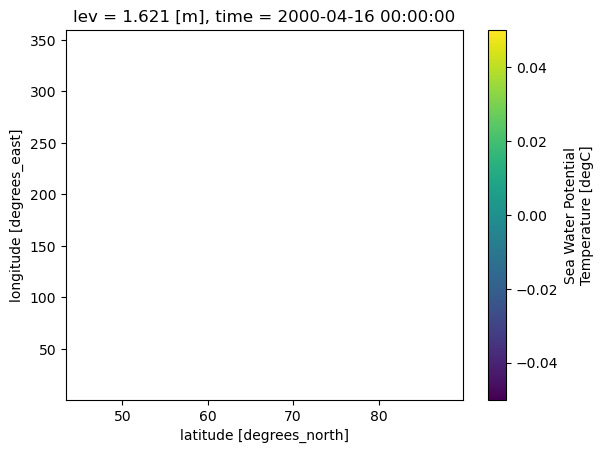

In [12]:
dsnew.thetao.sel(time='2000-04').isel(lev=1).plot(x='latitude',y='longitude',robust=True)

In [ ]:
dsnew.thetao.sel(time='2000-04').isel(lev=1).compute()


In [ ]:
dsnew.thetao.sel(time='2000-04').isel(lev=1).count()

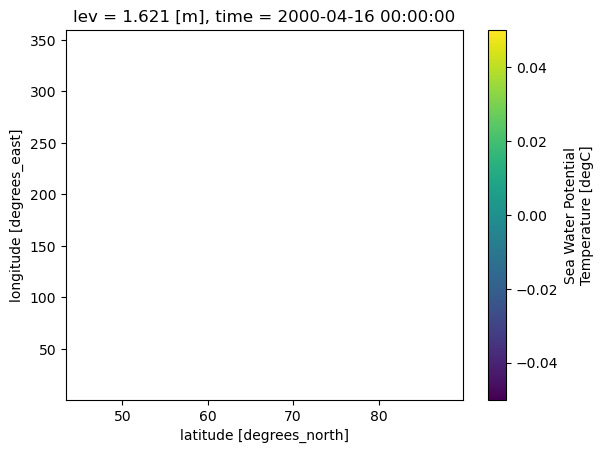

In [14]:
test.thetao.sel(time='2000-04').isel(lev=1).plot(x='latitude',y='longitude',robust=True)

In [2]:
target = s3fs.S3FileSystem(anon=False,client_kwargs=client_kwargs,key=access_key,secret=secret_key)
path='WAFFLES/tinatest'
s3_prefix = "s3://" + path
uri = f"{s3_prefix}/{model}_no_prep_thetao.zarr"
print('saving zarr file at '+ uri)

#target.rm('WAFFLES/tinatest/CMCC-CM2-SR5.zarr',recursive=True)
#target.ls('WAFFLES/tinatest/')

In [3]:
target.ls('WAFFLES/tinatest/')

['WAFFLES/tinatest/CMCC-CM2-SR5',
 'WAFFLES/tinatest/CMCC-CM2-SR5.zarr',
 'WAFFLES/tinatest/CMCC-CM2-SR5_no_prep.zarr',
 'WAFFLES/tinatest/CMCC-CM2-SR5_t.zarr']

In [4]:
uri='s3://WAFFLES/tinatest/CMCC-CM2-SR5_t.zarr'
store = zarr.storage.FSStore(uri,client_kwargs=client_kwargs,
                             key=access_key, secret=secret_key)

In [5]:
loadds=xr.open_zarr(store=store)
loadds

<xarray.Dataset>
Dimensions:             (i: 360, j: 72, lev: 50, bnds: 2, time: 732, vertices: 4)
Coordinates:
  * i                   (i) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * j                   (j) float64 219.0 220.0 221.0 ... 288.0 289.0 290.0
    latitude            (j, i) float64 dask.array<chunksize=(72, 360), meta=np.ndarray>
  * lev                 (lev) float64 0.5126 1.621 2.858 ... 5.498e+03 5.904e+03
    longitude           (j, i) float64 dask.array<chunksize=(72, 360), meta=np.ndarray>
  * time                (time) object 1958-01-16 12:00:00 ... 2018-12-16 12:0...
Dimensions without coordinates: bnds, vertices
Data variables:
    lev_bnds            (lev, bnds, j, i) float64 dask.array<chunksize=(50, 2, 72, 360), meta=np.ndarray>
    thetao              (time, lev, j, i) float32 dask.array<chunksize=(1, 25, 72, 180), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(72, 360, 2), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(72, 360, 2), meta=np.ndarray>
Attributes: (12/39)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           OMIP
    cmor_version:          3.5.0
    comment:               Ocean initial conditions: WOA 2013 T & S; ocean at...
    contact:               Pier Giuseppe Fogli (piergiuseppe.fogli@cmcc.it)
    creation_date:         2020-02-19T13:19:38Z
    ...                    ...
    table_id:              Omon
    table_info:            Creation Date:(15 January 2020) MD5:bc48740ff90dcf...
    title:                 CMCC-CM2-SR5 output prepared for CMIP6
    tracking_id:           hdl:21.14100/1b7c2d37-0a5c-43c0-8a3b-d534e03c401f
    variable_id:           thetao
    variant_label:         r1i1p1f1

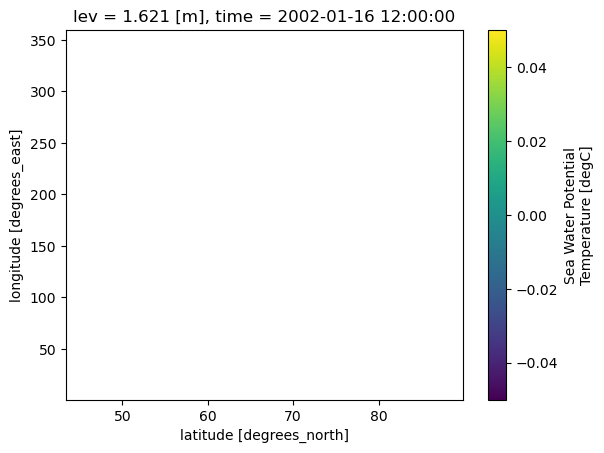

In [6]:
loadds.thetao.sel(time='2002-01').isel(lev=1).plot(x='latitude',y='longitude',robust=True)